Student: Denny Boechat.

Course: Advanced Big Data and Data Mining (MSCS-634-B01).

Deliverable 4: Data Mining Techniques for a Healthcare Dataset

In [2]:
import pandas as pd

df = pd.read_csv('dataset/general_dentistry_appointments.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   project_name                      661 non-null    object 
 1   appointment_date                  661 non-null    object 
 2   appointment_type                  661 non-null    object 
 3   patient_full_name                 661 non-null    object 
 4   patient_date_of_birth             661 non-null    object 
 5   patient_phone_number              213 non-null    object 
 6   gender                            661 non-null    object 
 7   appointment_notes                 581 non-null    object 
 8   prescribed_medications            121 non-null    object 
 9   patient_height                    426 non-null    float64
 10  patient_weight                    446 non-null    float64
 11  patient_temperature               447 non-null    float64
 12  patient_

,patient_height,patient_weight,patient_temperature,patient_blood_glucose,patient_pulse,patient_oxygen_saturation,patient_blood_pressure_diastolic
count,426.000000,446.000000,447.000000,292.000000,448.000000,447.000000,360.000000
mean,154.134272,69.017175,36.601790,118.955479,84.968750,97.655481,81.847222
std,29.600827,36.508683,0.307888,58.011979,16.534525,1.662663,11.812438
min,60.000000,6.400000,35.500000,40.000000,45.000000,77.000000,48.000000
25%,138.000000,31.400000,36.400000,93.000000,74.000000,97.000000,74.000000
50%,165.000000,79.150000,36.600000,103.000000,83.000000,98.000000,82.000000
75%,176.000000,96.900000,36.800000,123.000000,94.000000,99.000000,90.000000
max,196.000000,168.000000,37.700000,528.000000,152.000000,100.000000,122.000000


Data Distribution (Histograms)

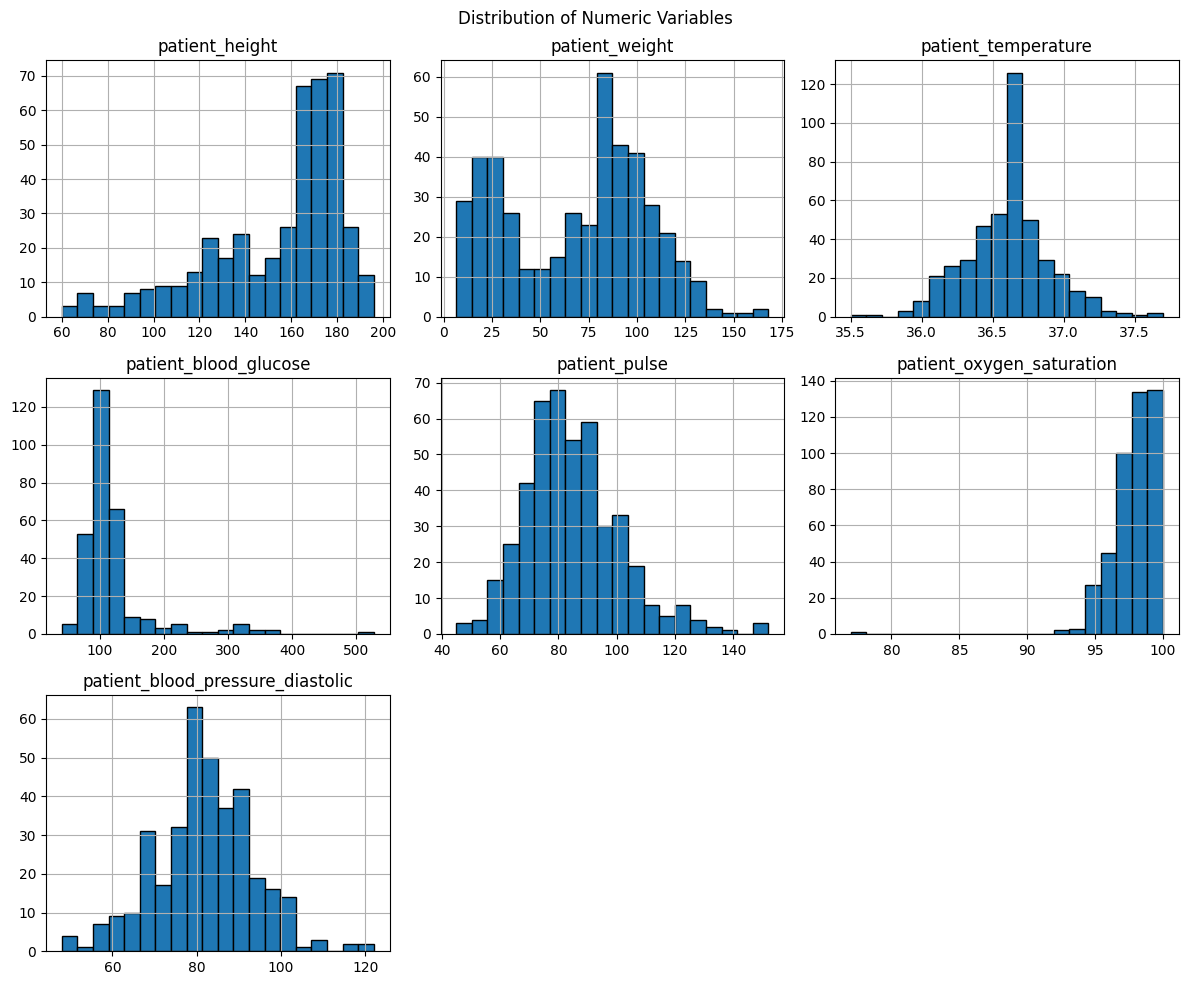

In [5]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Variables")
plt.tight_layout()
plt.show()

Outlier Detection (Boxplots)

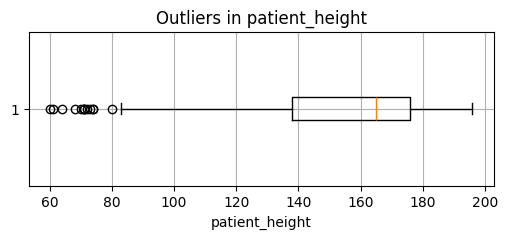

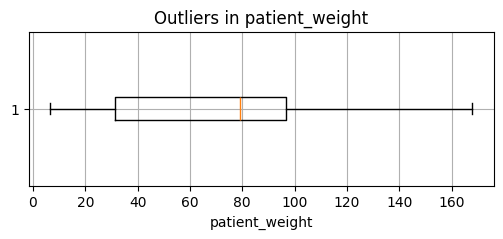

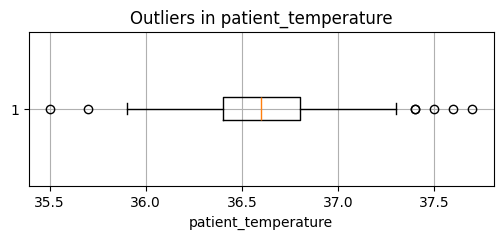

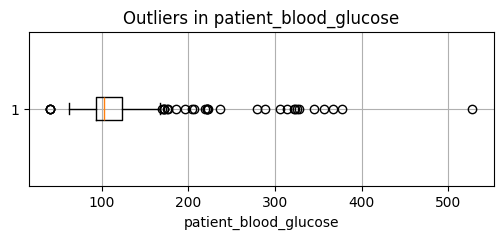

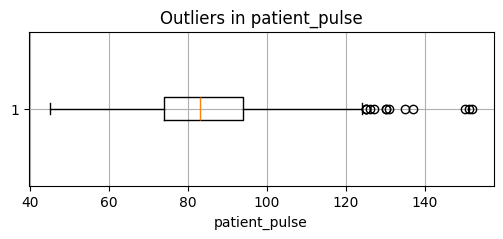

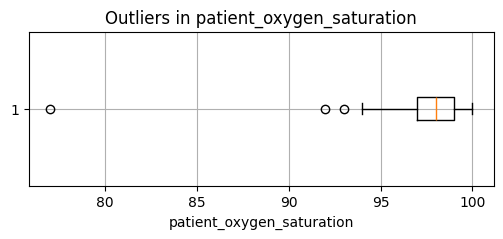

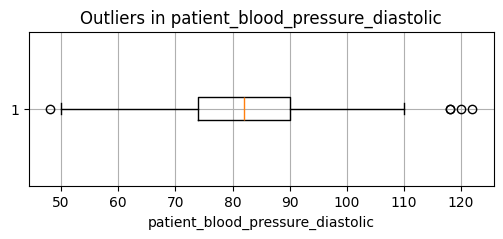

In [7]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

Feature Relationships

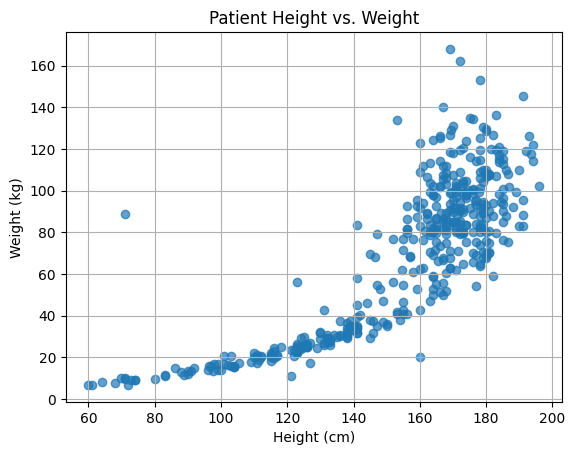

In [8]:
plt.scatter(df['patient_height'], df['patient_weight'], alpha=0.7)
plt.title("Patient Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()

Data cleanup

In [9]:
# --- 1. Standardize date columns ---
df["appointment_date"] = pd.to_datetime(df["appointment_date"], errors="coerce")
df["patient_date_of_birth"] = pd.to_datetime(df["patient_date_of_birth"], errors="coerce")

# --- 2. Strip whitespace & normalize text ---
str_cols = df.select_dtypes(include="object").columns
for col in str_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# --- 3. Handle missing values ---
# Fill missing phone numbers with "unknown"
df["patient_phone_number"] = df["patient_phone_number"].fillna("unknown")

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# --- 4. Remove duplicates ---
df = df.drop_duplicates()

# --- 5. Standardize categorical values ---
df["gender"] = df["gender"].replace({
    "f": "female", "m": "male", "other": "other"
})

# --- 6. Feature engineering (optional) ---
# Calculate patient age
today = pd.Timestamp.today()
df["patient_age"] = df["patient_date_of_birth"].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    if pd.notnull(x) else None
)

# --- 7. Reset index after cleaning ---
df.reset_index(drop=True, inplace=True)

# Save cleaned dataset
df.to_csv("dataset/general_dentistry_appointments_cleaned.csv", index=False)

df.head()

,project_name,appointment_date,appointment_type,patient_full_name,patient_date_of_birth,patient_phone_number,gender,appointment_notes,prescribed_medications,patient_height,patient_weight,patient_temperature,patient_blood_glucose,patient_pulse,patient_oxygen_saturation,patient_blood_pressure_diastolic,treated_teeth,patient_age
0,fiji med health - mana island,2024-03-27 00:00:00.000,general,asena sekolatika,2012-09-04,nan,female,"right ear pain, tm bilateral, tinea face gave ...",nan,165.0,79.15,36.9,103.0,82.0,100.0,82.0,nan,12
1,fiji med health - mana island,2025-03-24 05:13:42.979,general,luke koroitaiti,1990-08-06,8049920,male,tooth ache left upper back tooth painful x 2 w...,nan,189.0,99.40,36.5,100.0,84.0,98.0,76.0,nan,35
2,fiji med health - mana island,2025-03-25 21:27:44.284,general,mariana miliana,1984-12-18,8008208,female,"hpi: returning today for abd check, has interm...",nan,167.0,85.20,36.3,103.0,82.0,95.0,70.0,nan,40
3,fiji med health - mana island,2025-03-24 07:21:20.892,general,sikeli kurukuru,2002-12-05,nan,male,birth date correction: 12/5/2002.\n\nhpi: c/o ...,paracetamol 500 - 30,180.0,68.80,36.8,95.0,75.0,97.0,72.0,nan,22
4,fiji med health - mana island,2025-03-23 23:00:12.252,general,nacanieli namada,1975-06-08,2096770,male,leg rash—rx given for hydrocortisone as directed,nan,177.0,95.30,36.6,136.0,75.0,98.0,88.0,nan,50


Sensitive-data cleanup

In [11]:
# Drop sensitive columns (safe even if missing)
pii_cols = ["patient_full_name", "patient_phone_number"]
df = df.drop(columns=[c for c in pii_cols if c in df.columns])

# (Optional) verify no PII-like columns slipped through
# e.g., anything that looks like phone/name; keep this light-touch:
possible_pii = [c for c in df.columns if "phone" in c.lower() or "name" in c.lower()]
if possible_pii:
    print("Review these columns for PII before sharing:", possible_pii)

# Save the de-identified version
df.to_csv("dataset/general_dentistry_appointments_cleaned_public.csv", index=False)
print("Saved de-identified file: dataset/general_dentistry_appointments_cleaned_public.csv")

df.head()

Review these columns for PII before sharing: ['project_name']
Saved de-identified file: dataset/general_dentistry_appointments_cleaned_public.csv


,project_name,appointment_date,appointment_type,patient_date_of_birth,gender,appointment_notes,prescribed_medications,patient_height,patient_weight,patient_temperature,patient_blood_glucose,patient_pulse,patient_oxygen_saturation,patient_blood_pressure_diastolic,treated_teeth,patient_age
0,fiji med health - mana island,2024-03-27 00:00:00.000,general,2012-09-04,female,"right ear pain, tm bilateral, tinea face gave ...",nan,165.0,79.15,36.9,103.0,82.0,100.0,82.0,nan,12
1,fiji med health - mana island,2025-03-24 05:13:42.979,general,1990-08-06,male,tooth ache left upper back tooth painful x 2 w...,nan,189.0,99.40,36.5,100.0,84.0,98.0,76.0,nan,35
2,fiji med health - mana island,2025-03-25 21:27:44.284,general,1984-12-18,female,"hpi: returning today for abd check, has interm...",nan,167.0,85.20,36.3,103.0,82.0,95.0,70.0,nan,40
3,fiji med health - mana island,2025-03-24 07:21:20.892,general,2002-12-05,male,birth date correction: 12/5/2002.\n\nhpi: c/o ...,paracetamol 500 - 30,180.0,68.80,36.8,95.0,75.0,97.0,72.0,nan,22
4,fiji med health - mana island,2025-03-23 23:00:12.252,general,1975-06-08,male,leg rash—rx given for hydrocortisone as directed,nan,177.0,95.30,36.6,136.0,75.0,98.0,88.0,nan,50


Perform feature engineering to create or improve features that enhance model performance.

In [15]:
import pandas as pd
import numpy as np
import re

# --- Load cleaned data ---
df = pd.read_csv("dataset/general_dentistry_appointments_cleaned.csv", parse_dates=["appointment_date", "patient_date_of_birth"])

# --- 1. Age ---
today = pd.Timestamp.today()
df["patient_age"] = df["patient_date_of_birth"].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    if pd.notnull(x) else np.nan
)

# --- 2. BMI ---
def safe_bmi(weight_kg, height_cm):
    if pd.isna(weight_kg) or pd.isna(height_cm):
        return np.nan
    if not (25 <= weight_kg <= 300 and 100 <= height_cm <= 250):
        return np.nan
    return weight_kg / ((height_cm/100) ** 2)

if "patient_weight" in df.columns and "patient_height" in df.columns:
    df["bmi"] = [safe_bmi(w, h) for w, h in zip(df["patient_weight"], df["patient_height"])]

# --- 3. Calendar features ---
df["appt_month"] = df["appointment_date"].dt.month
df["appt_dayofweek"] = df["appointment_date"].dt.dayofweek  # 0=Monday
df["appt_is_weekend"] = df["appt_dayofweek"].isin([5,6]).astype("Int64")

# --- 4. Vitals flags ---
if "patient_temperature" in df.columns:
    df["flag_fever"] = df["patient_temperature"].apply(lambda x: x >= 38.0 if pd.notna(x) else np.nan)

if "patient_oxygen_saturation" in df.columns:
    df["flag_low_spo2"] = df["patient_oxygen_saturation"].apply(lambda x: x < 95 if pd.notna(x) else np.nan)

# --- 5. Notes keywords (light version) ---
if "appointment_notes" in df.columns:
    notes = df["appointment_notes"].fillna("").astype(str).str.lower()
    df["kw_pain"] = notes.str.contains(r"\b(pain|ache|sore)\b")
    df["kw_checkup"] = notes.str.contains(r"\b(check-up|checkup|routine)\b")

# --- Save smaller feature set ---
out_path = "dataset/general_dentistry_appointments_features_small.csv"
df.to_csv(out_path, index=False)

print(f"Smaller feature set saved to: {out_path}")
df.head()


Smaller feature set saved to: dataset/general_dentistry_appointments_features_small.csv


/var/folders/46/_hl5bfp93lg7cbns921v0zkw0000gn/T/ipykernel_17017/3767571381.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["kw_pain"] = notes.str.contains(r"\b(pain|ache|sore)\b")
/var/folders/46/_hl5bfp93lg7cbns921v0zkw0000gn/T/ipykernel_17017/3767571381.py:42: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["kw_checkup"] = notes.str.contains(r"\b(check-up|checkup|routine)\b")


,project_name,appointment_date,appointment_type,patient_full_name,patient_date_of_birth,patient_phone_number,gender,appointment_notes,prescribed_medications,patient_height,...,treated_teeth,patient_age,bmi,appt_month,appt_dayofweek,appt_is_weekend,flag_fever,flag_low_spo2,kw_pain,kw_checkup
0,fiji med health - mana island,2024-03-27 00:00:00.000,general,asena sekolatika,2012-09-04,NaN,female,"right ear pain, tm bilateral, tinea face gave ...",NaN,165.0,...,NaN,12,29.072544,3,2,0,False,False,True,False
1,fiji med health - mana island,2025-03-24 05:13:42.979,general,luke koroitaiti,1990-08-06,8049920,male,tooth ache left upper back tooth painful x 2 w...,NaN,189.0,...,NaN,35,27.826769,3,0,0,False,False,True,False
2,fiji med health - mana island,2025-03-25 21:27:44.284,general,mariana miliana,1984-12-18,8008208,female,"hpi: returning today for abd check, has interm...",NaN,167.0,...,NaN,40,30.549679,3,1,0,False,False,True,False
3,fiji med health - mana island,2025-03-24 07:21:20.892,general,sikeli kurukuru,2002-12-05,NaN,male,birth date correction: 12/5/2002.\n\nhpi: c/o ...,paracetamol 500 - 30,180.0,...,NaN,22,21.234568,3,0,0,False,False,True,False
4,fiji med health - mana island,2025-03-23 23:00:12.252,general,nacanieli namada,1975-06-08,2096770,male,leg rash—rx given for hydrocortisone as directed,NaN,177.0,...,NaN,50,30.419101,3,6,1,False,False,False,False


Linear Regression on engineered features for patient_blood_glucose

In [16]:
import pandas as pd
import numpy as np
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# 1) Build/align features
# --------------------------

# Ensure lowercase appointment_type to avoid case mismatches
if "appointment_type" in df.columns:
    appt_type = df["appointment_type"].astype(str).str.lower()
else:
    appt_type = pd.Series("", index=df.index)

# patient_age (create if missing)
if "patient_age" not in df.columns and "patient_date_of_birth" in df.columns:
    dob = pd.to_datetime(df["patient_date_of_birth"], errors="coerce")
    today = pd.Timestamp.today()
    df["patient_age"] = dob.apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else np.nan)

# bmi (create if missing) from height/weight if available
if "bmi" not in df.columns:
    hcol = "patient_height_cm" if "patient_height_cm" in df.columns else None
    wcol = "patient_weight_kg" if "patient_weight_kg" in df.columns else None
    if hcol and wcol:
        def safe_bmi(w, h):
            if pd.isna(w) or pd.isna(h): return np.nan
            if not (25 <= w <= 300 and 100 <= h <= 250): return np.nan
            return w / ((h/100) ** 2)
        df["bmi"] = [safe_bmi(w, h) for w, h in zip(df[wcol], df[hcol])]

# has_general_appointment / has_dental_appointment
df["has_general_appointment"] = appt_type.eq("general").astype("Int64")
df["has_dental_appointment"]  = appt_type.str.contains("dental", na=False).astype("Int64")

# has_general_medications / has_dental_medications
has_meds = df.get("prescribed_medications", pd.Series(index=df.index, dtype="object")).notna().astype(int)
df["has_general_medications"] = ((appt_type.eq("general")) & (has_meds == 1)).astype(int)
df["has_dental_medications"]  = ((appt_type.str.contains("dental", na=False)) & (has_meds == 1)).astype(int)

# treated_teeth_count (parse "treated_teeth" like "14, 15" → 2)
def count_teeth(val):
    if pd.isna(val) or str(val).strip()=="":
        return 0
    s = str(val)
    if "," in s:
        return len([t for t in s.split(",") if t.strip()!=""])
    # handle space-separated or single values too
    return len([t for t in re.split(r"[,\s]+", s) if t.strip()!=""])
df["treated_teeth_count"] = df.get("treated_teeth", pd.Series(index=df.index)).apply(count_teeth)

# general_note_length / dental_note_length (word counts)
notes = df.get("appointment_notes", pd.Series("", index=df.index)).fillna("").astype(str)
word_count = notes.str.split().str.len()
df["general_note_length"] = (appt_type.eq("general")).astype(int) * word_count
df["dental_note_length"]  = (appt_type.str.contains("dental", na=False)).astype(int) * word_count

# abnormal_temperature (≥38°C or ≤35°C)
temp_col = "patient_temperature_celsius" if "patient_temperature_celsius" in df.columns else "patient_temperature"
if temp_col in df.columns:
    df["abnormal_temperature"] = df[temp_col].apply(lambda x: int(pd.notna(x) and (x >= 38.0 or x <= 35.0)))
else:
    df["abnormal_temperature"] = 0

# abnormal_pulse (<60 or >100 bpm)
if "patient_pulse" in df.columns:
    df["abnormal_pulse"] = df["patient_pulse"].apply(lambda x: int(pd.notna(x) and (x < 60 or x > 100)))
else:
    df["abnormal_pulse"] = 0

# abnormal_oxygen_saturation (<95%)
if "patient_oxygen_saturation" in df.columns:
    df["abnormal_oxygen_saturation"] = df["patient_oxygen_saturation"].apply(lambda x: int(pd.notna(x) and (x < 95)))
else:
    df["abnormal_oxygen_saturation"] = 0

# --------------------------
# 2) Define target & features
# --------------------------
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Keep only existing columns; warn if any are missing
existing_features = [c for c in features if c in df.columns]
missing_features = [c for c in features if c not in df.columns]
if missing_features:
    print("⚠️ Missing feature columns (skipped):", missing_features)

# --------------------------
# 3) Train/test split
# --------------------------
model_data = df[existing_features + [target]].dropna()
if model_data.empty:
    raise ValueError("No rows available after dropping NaNs. Check feature/target availability and NaN rates.")

X = model_data[existing_features]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 4) Train, predict, evaluate
# --------------------------
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared Score:   {r2:.3f}")

# Coefficients
coef_df = pd.DataFrame({
    "Feature": existing_features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=np.abs, ascending=False)

display(coef_df)


Mean Squared Error: 2278.936
R-squared Score:   0.046


,Feature,Coefficient
11,abnormal_oxygen_saturation,-35.659031
5,has_dental_medications,-10.398060
10,abnormal_pulse,2.083490
4,has_general_medications,-0.875235
2,has_general_appointment,0.626716
3,has_dental_appointment,-0.626716
0,patient_age,0.613529
8,dental_note_length,0.528120
6,treated_teeth_count,-0.257610
1,bmi,-0.208297


Multiple Linear Regression for patient_blood_glucose

In [17]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Keep only available features to avoid KeyErrors:
existing_features = [c for c in features if c in df.columns]
missing = [c for c in features if c not in df.columns]
if missing:
    print("⚠️ Missing features (skipped):", missing)

# Prepare data
model_data = df[existing_features + [target]].dropna()
if model_data.empty:
    raise ValueError("No rows after dropna. Check NaNs or ensure the engineered features/target are present.")

X = model_data[existing_features]
y = model_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Multiple Linear Regression
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = multi_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Multiple Linear Regression Results")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²):           {r2:.3f}")
print(f"Intercept:                {multi_reg_model.intercept_:.3f}")

# Coefficients (unstandardized)
coef_df = pd.DataFrame({
    "Feature": existing_features,
    "Coefficient": multi_reg_model.coef_
}).sort_values(by="Coefficient", key=np.abs, ascending=False)
print("\nModel Coefficients (unstandardized):")
display(coef_df)

# ---- Optional: Standardized coefficients (effect size comparison) ----
# Standardize X and y, refit the same model to get beta coefficients on the same scale.
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_std = scaler_X.fit_transform(X_train)
X_test_std  = scaler_X.transform(X_test)
y_train_std = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

std_model = LinearRegression()
std_model.fit(X_train_std, y_train_std)

std_coef_df = pd.DataFrame({
    "Feature": existing_features,
    "Standardized Coef": std_model.coef_
}).sort_values(by="Standardized Coef", key=np.abs, ascending=False)

print("\nStandardized Coefficients (absolute size is comparable):")
display(std_coef_df)


Multiple Linear Regression Results
Mean Squared Error (MSE): 2278.936
R-squared (R²):           0.046
Intercept:                93.251

Model Coefficients (unstandardized):


,Feature,Coefficient
11,abnormal_oxygen_saturation,-35.659031
5,has_dental_medications,-10.398060
10,abnormal_pulse,2.083490
4,has_general_medications,-0.875235
2,has_general_appointment,0.626716
3,has_dental_appointment,-0.626716
0,patient_age,0.613529
8,dental_note_length,0.528120
6,treated_teeth_count,-0.257610
1,bmi,-0.208297



Standardized Coefficients (absolute size is comparable):


,Feature,Standardized Coef
0,patient_age,0.289927
7,general_note_length,0.090047
11,abnormal_oxygen_saturation,-0.072208
5,has_dental_medications,-0.060417
8,dental_note_length,0.044983
1,bmi,-0.034154
10,abnormal_pulse,0.014604
6,treated_teeth_count,-0.010775
4,has_general_medications,-0.007258
2,has_general_appointment,0.007108


Lasso & LassoCV for patient_blood_glucose

In [18]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Target & features ---
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Keep only existing features to avoid KeyErrors
existing = [c for c in features if c in df.columns]
missing = [c for c in features if c not in df.columns]
if missing:
    print("⚠️ Missing features (skipped):", missing)

# Prepare data
model_data = df[existing + [target]].dropna()
if model_data.empty:
    raise ValueError("No rows after dropna; check NaNs or ensure engineered features/target exist.")

X = model_data[existing]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 1) Lasso with a fixed alpha (mirrors your example) ---
lasso_fixed = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.1, max_iter=10000, random_state=42))
])
lasso_fixed.fit(X_train, y_train)
y_pred_fixed = lasso_fixed.predict(X_test)

mse_fixed = mean_squared_error(y_test, y_pred_fixed)
r2_fixed  = r2_score(y_test, y_pred_fixed)

print("=== Lasso (fixed alpha=0.1) ===")
print(f"MSE: {mse_fixed:.3f}")
print(f"R² : {r2_fixed:.3f}")

coefs_fixed = pd.Series(
    lasso_fixed.named_steps["lasso"].coef_,
    index=existing, name="Coefficient"
)
print("\nNon-zero coefficients (fixed alpha):")
display(coefs_fixed[coefs_fixed != 0].sort_values(key=np.abs, ascending=False))

# --- 2) LassoCV to tune alpha automatically ---
alphas = np.logspace(-3, 1, 40)  # 0.001 → 10
lasso_cv = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42))
])
lasso_cv.fit(X_train, y_train)
y_pred_cv = lasso_cv.predict(X_test)

mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv  = r2_score(y_test, y_pred_cv)
best_alpha = lasso_cv.named_steps["lasso"].alpha_

print("\n=== LassoCV (auto-tuned alpha) ===")
print(f"Best alpha: {best_alpha:.5f}")
print(f"MSE:        {mse_cv:.3f}")
print(f"R² :        {r2_cv:.3f}")

coefs_cv = pd.Series(
    lasso_cv.named_steps["lasso"].coef_,
    index=existing, name="Coefficient"
)
print("\nNon-zero coefficients (LassoCV):")
display(coefs_cv[coefs_cv != 0].sort_values(key=np.abs, ascending=False))


=== Lasso (fixed alpha=0.1) ===
MSE: 2277.134
R² : 0.046

Non-zero coefficients (fixed alpha):


patient_age                   1.125570e+01
general_note_length           3.431731e+00
abnormal_oxygen_saturation   -2.762364e+00
has_dental_medications       -2.278252e+00
dental_note_length            1.549986e+00
bmi                          -1.183906e+00
has_general_appointment       5.167652e-01
abnormal_pulse                5.094150e-01
treated_teeth_count          -3.722240e-01
has_general_medications      -1.212671e-01
has_dental_appointment       -6.905923e-16
Name: Coefficient, dtype: float64


=== LassoCV (auto-tuned alpha) ===
Best alpha: 0.94267
MSE:        2267.182
R² :        0.051

Non-zero coefficients (LassoCV):


patient_age                   9.609515e+00
general_note_length           2.761861e+00
abnormal_oxygen_saturation   -1.886520e+00
has_dental_medications       -1.364727e+00
has_general_appointment       2.205078e-01
has_dental_appointment       -3.683159e-16
Name: Coefficient, dtype: float64

Ridge & RidgeCV for patient_blood_glucose

In [19]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Target & features
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Keep only existing features
existing = [c for c in features if c in df.columns]
missing = [c for c in features if c not in df.columns]
if missing:
    print("⚠️ Missing features (skipped):", missing)

# Prepare data
model_data = df[existing + [target]].dropna()
if model_data.empty:
    raise ValueError("No rows after dropna; check NaNs or ensure engineered features/target exist.")

X = model_data[existing]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1) Ridge with fixed alpha (mirrors your example, but with scaling)
ridge_fixed = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])
ridge_fixed.fit(X_train, y_train)
y_pred_fixed = ridge_fixed.predict(X_test)

mse_fixed = mean_squared_error(y_test, y_pred_fixed)
r2_fixed  = r2_score(y_test, y_pred_fixed)

print("=== Ridge (fixed alpha=1.0) ===")
print(f"MSE: {mse_fixed:.3f}")
print(f"R² : {r2_fixed:.3f}")

coef_fixed = pd.Series(
    ridge_fixed.named_steps["ridge"].coef_,
    index=existing, name="Coefficient"
).sort_values(key=np.abs, ascending=False)
print("\nCoefficients (fixed alpha, sorted by |coef|):")
display(coef_fixed)

# 2) RidgeCV to tune alpha automatically
alphas = np.logspace(-3, 3, 50)  # 0.001 → 1000
ridge_cv = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, cv=5))
])
ridge_cv.fit(X_train, y_train)
y_pred_cv = ridge_cv.predict(X_test)

mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv  = r2_score(y_test, y_pred_cv)
best_alpha = ridge_cv.named_steps["ridge"].alpha_

print("\n=== RidgeCV (auto-tuned alpha) ===")
print(f"Best alpha: {best_alpha:.6f}")
print(f"MSE:        {mse_cv:.3f}")
print(f"R² :        {r2_cv:.3f}")

coef_cv = pd.Series(
    ridge_cv.named_steps["ridge"].coef_,
    index=existing, name="Coefficient"
).sort_values(key=np.abs, ascending=False)
print("\nCoefficients (RidgeCV, sorted by |coef|):")
display(coef_cv)


=== Ridge (fixed alpha=1.0) ===
MSE: 2279.006
R² : 0.046

Coefficients (fixed alpha, sorted by |coef|):


patient_age                   11.449930
general_note_length            3.554830
abnormal_oxygen_saturation    -2.854591
has_dental_medications        -2.377798
dental_note_length             1.770743
bmi                           -1.335192
abnormal_pulse                 0.577287
treated_teeth_count           -0.429044
has_dental_appointment        -0.287675
has_general_appointment        0.287675
has_general_medications       -0.281378
abnormal_temperature           0.000000
Name: Coefficient, dtype: float64


=== RidgeCV (auto-tuned alpha) ===
Best alpha: 138.949549
MSE:        2286.690
R² :        0.042

Coefficients (RidgeCV, sorted by |coef|):


patient_age                   8.075551
general_note_length           2.487068
abnormal_oxygen_saturation   -2.163967
has_dental_medications       -1.209480
dental_note_length            0.793258
has_dental_appointment       -0.719648
has_general_appointment       0.719648
treated_teeth_count          -0.485335
abnormal_pulse                0.434930
has_general_medications       0.196855
bmi                           0.009509
abnormal_temperature          0.000000
Name: Coefficient, dtype: float64

Evaluate Linear, Lasso, Ridge using R² (with scaling for Lasso/Ridge)

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

# ---- Target & features ----
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Keep only available features
existing = [c for c in features if c in df.columns]
missing = [c for c in features if c not in df.columns]
if missing:
    print("Missing features (skipped):", missing)

# Prep data
model_data = df[existing + [target]].dropna()
if model_data.empty:
    raise ValueError("No rows after dropna. Ensure features/target exist and NaNs are handled.")

X = model_data[existing]
y = model_data[target]
n, p = X.shape

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Models ----
models = {
    "Baseline (mean)": DummyRegressor(strategy="mean"),
    "Linear Regression": LinearRegression(),
    "Lasso (α=0.1)": Pipeline([("scaler", StandardScaler()),
                               ("model", Lasso(alpha=0.1, max_iter=10000, random_state=42))]),
    "Ridge (α=1.0)": Pipeline([("scaler", StandardScaler()),
                               ("model", Ridge(alpha=1.0, random_state=42))]),
}

# ---- Train/evaluate ----
rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # adjusted R² = 1 - (1-R²)*(n-1)/(n-p-1)
    adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - p - 1)) if len(y_test) > p + 1 else np.nan

    rows.append({
        "Model": name,
        "R²": r2,
        "Adj R²": adj_r2,
        "MSE": mse
    })

evaluation_df = pd.DataFrame(rows).sort_values(by="R²", ascending=False).reset_index(drop=True)

print("Model Evaluation Summary (higher R² is better):")
display(evaluation_df)


Model Evaluation Summary (higher R² is better):


,Model,R²,Adj R²,MSE
0,Lasso (α=0.1),0.046340,-0.064766,2277.134365
1,Linear Regression,0.045586,-0.065608,2278.936296
2,Ridge (α=1.0),0.045557,-0.065641,2279.005580
3,Baseline (mean),-0.004114,-0.121099,2397.608968


Evaluation using Mean Squared Error (MSE)

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Target and features
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Prepare dataset
model_data = df[features + [target]].dropna()
X = model_data[features]
y = model_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42)
}

# Train and evaluate with MSE
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"Model": name, "MSE": mse})

# Display results as DataFrame
mse_df = pd.DataFrame(results).sort_values(by="MSE")
print("Mean Squared Error (MSE) for each model:")
display(mse_df)


Mean Squared Error (MSE) for each model:


,Model,MSE
1,Lasso Regression,2207.788133
2,Ridge Regression,2236.127507
0,Linear Regression,2278.936296


5-fold Cross-Validation: MSE and R²

In [22]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Target & features
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Prepare dataset
model_data = df[features + [target]].dropna()
X = model_data[features]
y = model_data[target]

# Models (scale for Lasso/Ridge; plain Linear Regression doesn't need scaling)
models = {
    "Linear Regression": LinearRegression(),
    "Lasso (α=0.1)": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.1, max_iter=10000, random_state=42)),
    ]),
    "Ridge (α=1.0)": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0, random_state=42)),
    ]),
}

# 5-fold CV with shuffling for stability
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for name, model in models.items():
    scores = cross_validate(
        model, X, y, cv=cv,
        scoring={"mse": "neg_mean_squared_error", "r2": "r2"},
        return_train_score=False
    )
    mse_mean = -scores["test_mse"].mean()
    mse_std  =  scores["test_mse"].std()      # std of the negative values; sign doesn't affect magnitude
    r2_mean  =  scores["test_r2"].mean()
    r2_std   =  scores["test_r2"].std()

    rows.append({
        "Model": name,
        "Mean MSE": mse_mean,
        "Std MSE": mse_std,
        "Mean R²": r2_mean,
        "Std R²": r2_std
    })

cv_df = pd.DataFrame(rows).sort_values(by="Mean MSE").reset_index(drop=True)

print("Cross-Validation Results (5-fold):")
display(cv_df)


Cross-Validation Results (5-fold):


,Model,Mean MSE,Std MSE,Mean R²,Std R²
0,Lasso (α=0.1),1671.462073,468.071489,0.006828,0.087941
1,Ridge (α=1.0),1675.394236,464.867437,0.003172,0.092469
2,Linear Regression,1675.825838,464.308630,0.002719,0.093109


Visualize model performance with 5-fold CV (MSE & R²)

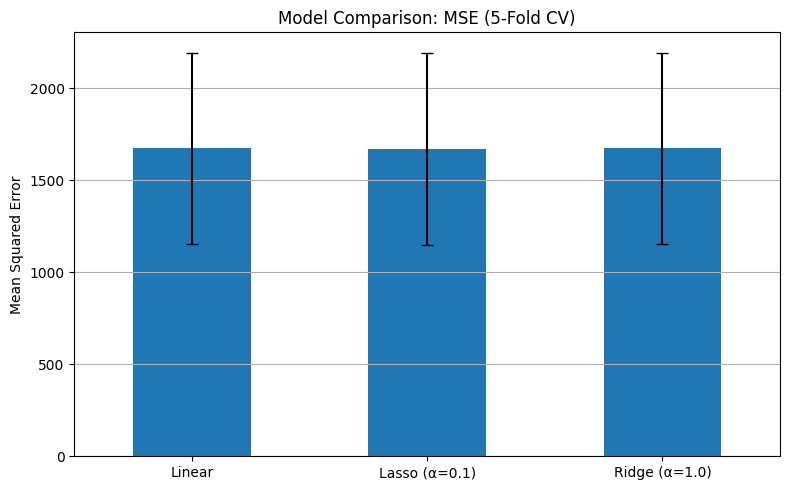

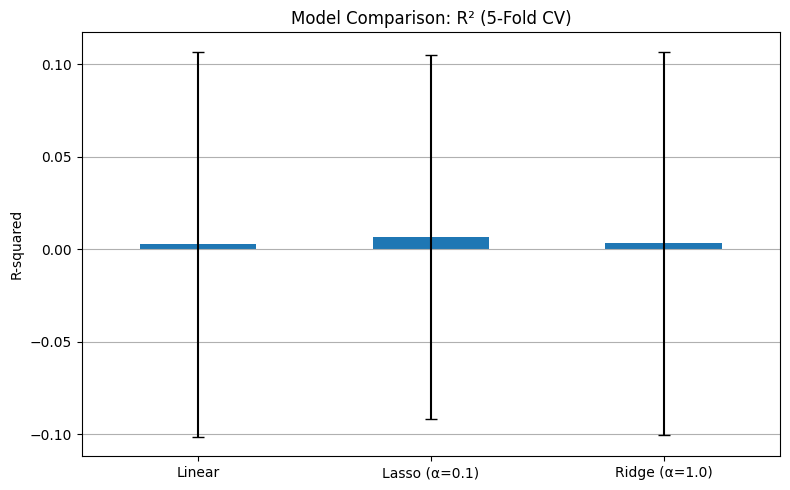

,Mean MSE,Std MSE,Mean R²,Std R²
Linear,1675.83,519.11,0.0027,0.1041
Lasso (α=0.1),1671.46,523.32,0.0068,0.0983
Ridge (α=1.0),1675.39,519.74,0.0032,0.1034


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Target & features
target = "patient_blood_glucose"
features = [
    "patient_age", "bmi",
    "has_general_appointment", "has_dental_appointment",
    "has_general_medications", "has_dental_medications",
    "treated_teeth_count",
    "general_note_length", "dental_note_length",
    "abnormal_temperature", "abnormal_pulse", "abnormal_oxygen_saturation"
]

# Prepare dataset
model_data = df[features + [target]].dropna()
X = model_data[features]
y = model_data[target]

# Models (scale for Lasso/Ridge)
models = {
    "Linear": LinearRegression(),
    "Lasso (α=0.1)": Pipeline([("scaler", StandardScaler()),
                               ("model", Lasso(alpha=0.1, max_iter=10000, random_state=42))]),
    "Ridge (α=1.0)": Pipeline([("scaler", StandardScaler()),
                               ("model", Ridge(alpha=1.0, random_state=42))]),
}

# CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Collect scores
mse_scores = {}
r2_scores  = {}

for name, model in models.items():
    mse = -cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)
    r2  =  cross_val_score(model, X, y, scoring="r2", cv=cv)
    mse_scores[name] = mse
    r2_scores[name]  = r2

mse_df = pd.DataFrame(mse_scores)
r2_df  = pd.DataFrame(r2_scores)

# --- Plot: MSE (lower is better) ---
plt.figure(figsize=(8, 5))
mse_df.mean().plot(kind="bar", yerr=mse_df.std(), capsize=4)
plt.ylabel("Mean Squared Error")
plt.title("Model Comparison: MSE (5-Fold CV)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# --- Plot: R² (higher is better) ---
plt.figure(figsize=(8, 5))
r2_df.mean().plot(kind="bar", yerr=r2_df.std(), capsize=4)
plt.ylabel("R-squared")
plt.title("Model Comparison: R² (5-Fold CV)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# (Optional) quick table
summary = pd.DataFrame({
    "Mean MSE": mse_df.mean().round(2),
    "Std MSE": mse_df.std().round(2),
    "Mean R²": r2_df.mean().round(4),
    "Std R²": r2_df.std().round(4),
})
display(summary)


Classification: Decision Tree (baseline) + tuned SVM (RBF)

In [27]:
# === Cell 1: Setup ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import inspect

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1) Choose a target column (auto-detect, override if you know it)
candidate_targets = [
    "no_show", "no_showed", "showed", "status", "outcome", "target",
    "label", "class", "cancelled", "appointment_status", "attended"
]
lower_cols = {c.lower(): c for c in df.columns}
target_col = next((lower_cols[k] for k in candidate_targets if k in lower_cols), None)
if target_col is None:
    target_col = df.columns[-1]
    print(f"[Info] No obvious target found; using last column: '{target_col}'")
# If you know it, uncomment:  target_col = "your_target_column_here"

# Drop fully empty columns
empty_cols = [c for c in df.columns if df[c].isna().all()]
if empty_cols:
    df = df.drop(columns=empty_cols)
    print(f"[Info] Dropped empty columns: {empty_cols}")

X = df.drop(columns=[target_col])
y_raw = df[target_col]

# Encode target: numeric → (binarize if many uniques); text → label-encode
if np.issubdtype(y_raw.dtype, np.number):
    y = y_raw.copy()
    uniq = pd.unique(y.dropna())
    if len(uniq) > 10:
        med = np.nanmedian(y)
        print(f"[Info] Numeric target with many unique values; binarizing at median ({med:.4g}).")
        y = (y > med).astype(int)
else:
    le = LabelEncoder()
    y = le.fit_transform(y_raw.astype(str))

# Remove classes with <2 samples (needed for stratification)
counts = pd.Series(y).value_counts()
rare = counts[counts < 2].index.tolist()
if rare:
    keep = pd.Series(y).isin(counts[counts >= 2].index)
    X = X.loc[keep].reset_index(drop=True)
    y = pd.Series(y)[keep].to_numpy()
    print(f"[Fix] Dropped rare classes (<2 samples): {rare}")

classes = np.unique(y)
if len(classes) < 2:
    raise ValueError("Only one class remains after filtering. Please pick a different target.")

print(f"Target: '{target_col}' — classes: {len(classes)} → {classes[:10]}")

# 2) Identify feature types
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]
print(f"Numeric features: {len(num_cols)} | Categorical features: {len(cat_cols)}")

# 3) Preprocessing
sig = inspect.signature(OneHotEncoder)
ohe_kwargs = {"handle_unknown": "ignore"}
if "sparse_output" in sig.parameters:   # sklearn >= 1.2
    ohe_kwargs["sparse_output"] = False
else:                                   # sklearn < 1.2
    ohe_kwargs["sparse"] = False

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(**ohe_kwargs))
])
preprocessor = ColumnTransformer(
    [("num", numeric_pipeline, num_cols),
     ("cat", categorical_pipeline, cat_cols)],
    remainder="drop"
)

# 4) Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 5) Model pipelines
dt_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
])

svm_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))
])

# 6) Helper to fit + score + (optionally) plot
def evaluate(pipe, name, X_train, y_train, X_test, y_test, classes):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Scores for ROC-AUC
    clf = pipe.named_steps["clf"]
    score = None
    if hasattr(clf, "predict_proba"):
        score = pipe.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        score = pipe.decision_function(X_test)

    avg = "binary" if len(classes) == 2 else "weighted"
    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average=avg, zero_division=0),
        "recall": recall_score(y_test, y_pred, average=avg, zero_division=0),
        "f1": f1_score(y_test, y_pred, average=avg, zero_division=0),
        "roc_auc": np.nan
    }

    try:
        if score is not None:
            if len(classes) == 2:
                s = score if np.ndim(score) == 1 else score[:, -1]
                metrics["roc_auc"] = roc_auc_score(y_test, s)
            else:
                from sklearn.preprocessing import label_binarize
                y_bin = label_binarize(y_test, classes=classes)
                s = score if score.ndim == 2 else np.column_stack(
                    [(score == c).astype(float) for c in classes]
                )
                metrics["roc_auc"] = roc_auc_score(y_bin, s, multi_class="ovr")
    except Exception as e:
        print(f"[Warn] ROC-AUC not computed for {name}: {e}")

    return metrics, y_pred, score


[Info] No obvious target found; using last column: 'abnormal_oxygen_saturation'
Target: 'abnormal_oxygen_saturation' — classes: 2 → [0 1]
Numeric features: 25 | Categorical features: 10


=== Baseline Metrics ===


,accuracy,precision,recall,f1,roc_auc
model,,,,,
Decision Tree (baseline),1.000000,1.0,1.0,1.000000,1.0
SVM (untuned),0.993976,1.0,0.5,0.666667,1.0



Decision Tree (baseline) — classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00         2

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166


SVM (untuned) — classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       164
           1       1.00      0.50      0.67         2

    accuracy                           0.99       166
   macro avg       1.00      0.75      0.83       166
weighted avg       0.99      0.99      0.99       166



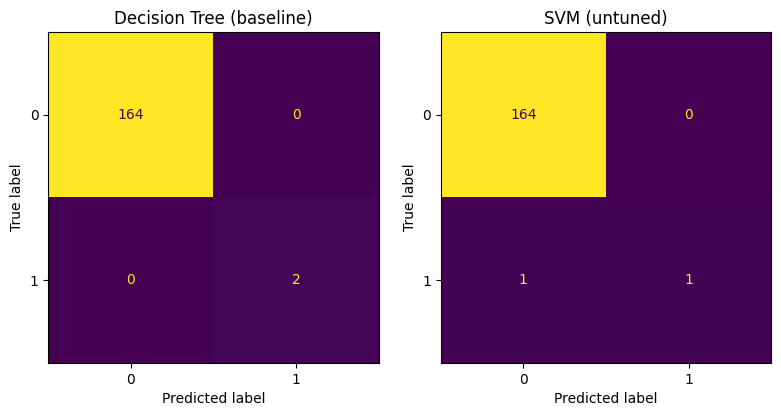

In [28]:
# === Cell 2: Baseline models (DT + untuned SVM) ===

# Fit & evaluate
dt_metrics, dt_pred, dt_score = evaluate(
    dt_pipe, "Decision Tree (baseline)",
    X_train, y_train, X_test, y_test, classes
)
svm_metrics, svm_pred, svm_score = evaluate(
    svm_pipe, "SVM (untuned)",
    X_train, y_train, X_test, y_test, classes
)

# Metrics table
baseline_results = pd.DataFrame([dt_metrics, svm_metrics]).set_index("model")
print("=== Baseline Metrics ===")
display(baseline_results.sort_values("f1", ascending=False))

# Classification reports
print("\nDecision Tree (baseline) — classification report")
print(classification_report(y_test, dt_pred, zero_division=0))

print("\nSVM (untuned) — classification report")
print(classification_report(y_test, svm_pred, zero_division=0))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, ax=axes[0], colorbar=False)
axes[0].set_title("Decision Tree (baseline)")
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, ax=axes[1], colorbar=False)
axes[1].set_title("SVM (untuned)")
plt.tight_layout()
plt.show()


[Info] Using StratifiedKFold with n_splits=4

[GridSearch] SVM best params: {'clf__C': 0.1, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
[GridSearch] SVM best CV score: 0.75

=== Comparison (sorted by F1) ===


,accuracy,precision,recall,f1,roc_auc
model,,,,,
SVM (tuned),1.000000,1.0,1.0,1.000000,1.0
Decision Tree (baseline),1.000000,1.0,1.0,1.000000,1.0
SVM (untuned),0.993976,1.0,0.5,0.666667,1.0


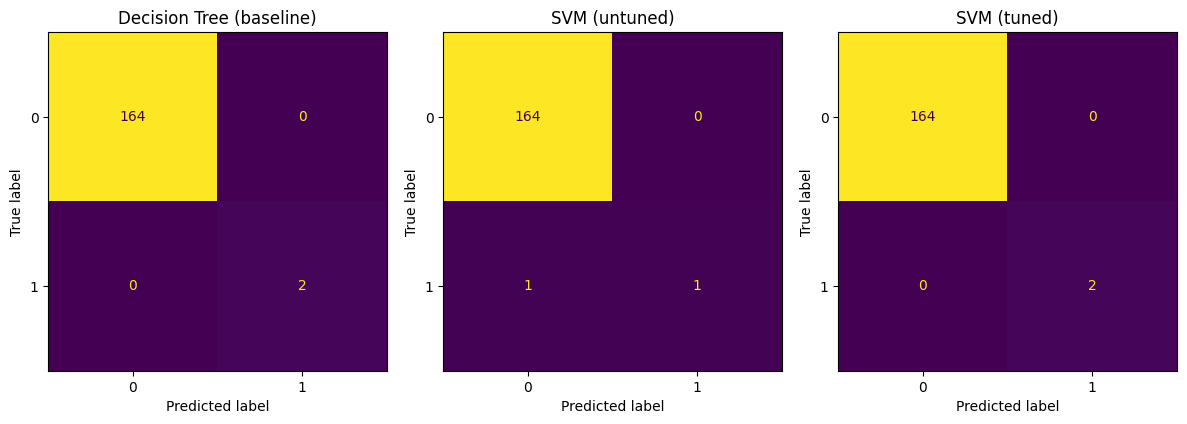

<Figure size 600x600 with 0 Axes>

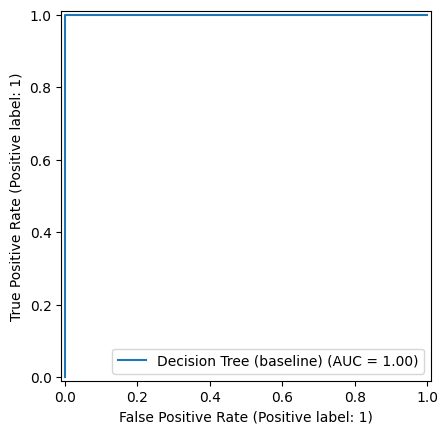

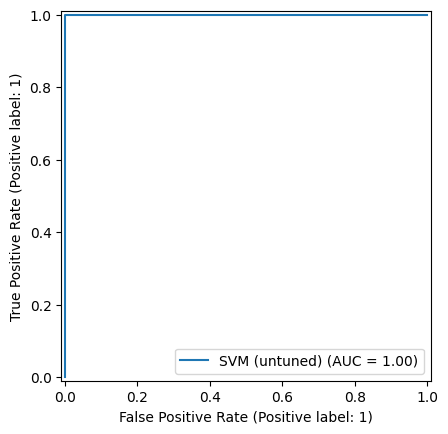

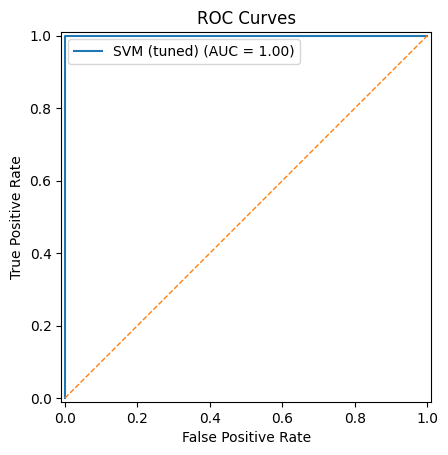

In [29]:
# === Cell 3: Tuned SVM (GridSearchCV) & comparison ===

# Adaptive CV folds based on smallest class count (2..5)
min_class = pd.Series(y_train).value_counts().min()
cv_splits = int(np.clip(min_class, 2, 5))
print(f"[Info] Using StratifiedKFold with n_splits={cv_splits}")
cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

# Parameter grid for SVM (RBF)
param_grid = {
    "clf__C": [0.1, 1, 10, 30],
    "clf__gamma": ["scale", 0.1, 0.03, 0.01],
    "clf__kernel": ["rbf"]
}
search = GridSearchCV(
    svm_pipe, param_grid, cv=cv,
    scoring="f1" if len(classes) == 2 else "f1_weighted",
    n_jobs=-1
)
search.fit(X_train, y_train)
svm_tuned = search.best_estimator_

print("\n[GridSearch] SVM best params:", search.best_params_)
print("[GridSearch] SVM best CV score:", search.best_score_)

# Evaluate tuned SVM
svm_tuned_metrics, svm_tuned_pred, svm_tuned_score = evaluate(
    svm_tuned, "SVM (tuned)",
    X_train, y_train, X_test, y_test, classes
)

# Compare all models
all_results = pd.DataFrame([
    svm_tuned_metrics,
    # Also include baselines from Cell 2 if still in memory:
    # (They should be, since we're in the same notebook kernel.)
    {"model": "Decision Tree (baseline)", **dt_metrics},
    {"model": "SVM (untuned)", **svm_metrics},
]).set_index("model")[["accuracy", "precision", "recall", "f1", "roc_auc"]]

print("\n=== Comparison (sorted by F1) ===")
display(all_results.sort_values("f1", ascending=False))

# Confusion matrices (3 models)
pred_map = {
    "Decision Tree (baseline)": dt_pred,
    "SVM (untuned)": svm_pred,
    "SVM (tuned)": svm_tuned_pred,
}
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, (name, preds) in zip(axes, pred_map.items()):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

# ROC curves (works for binary; will attempt weighted/multiclass where possible)
scores = {
    "Decision Tree (baseline)": dt_score,
    "SVM (untuned)": svm_score,
    "SVM (tuned)": svm_tuned_score
}
if any(s is not None for s in scores.values()):
    plt.figure(figsize=(6, 6))
    plotted = False
    for name, s in scores.items():
        if s is None:
            continue
        try:
            RocCurveDisplay.from_predictions(
                y_test,
                s if np.ndim(s) == 1 else s[:, -1],
                name=name
            )
            plotted = True
        except Exception:
            pass
    if plotted:
        plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
        plt.title("ROC Curves")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()


Unsupervised Clustering on Dentistry Appointments

Models: K-Means, Agglomerative, DBSCAN
Metrics: Silhouette, Calinski-Harabasz, Davies-Bouldin

[Info] No obvious target found for external validation; proceeding unsupervised only.
Numeric features: 26 | Categorical features: 10
Processed feature matrix shape: (661, 1996)


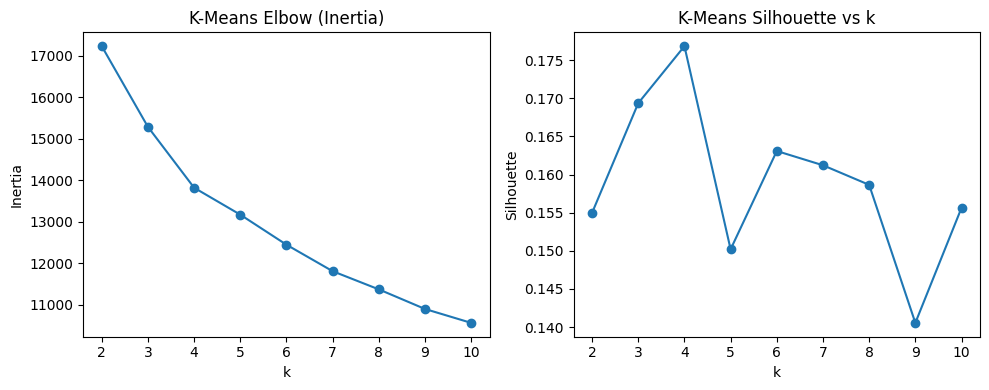

[Info] Selected k for K-Means/Agglomerative: 4

=== Clustering Metrics ===


,n_clusters,silhouette,calinski_harabasz,davies_bouldin,ARI_vs_y,NMI_vs_y
model,,,,,,
K-Means(k=4),4,0.176847,95.290077,1.682998,NaN,NaN
Agglomerative(k=4),4,0.171514,93.299014,1.711643,NaN,NaN
DBSCAN,0,NaN,NaN,NaN,NaN,NaN


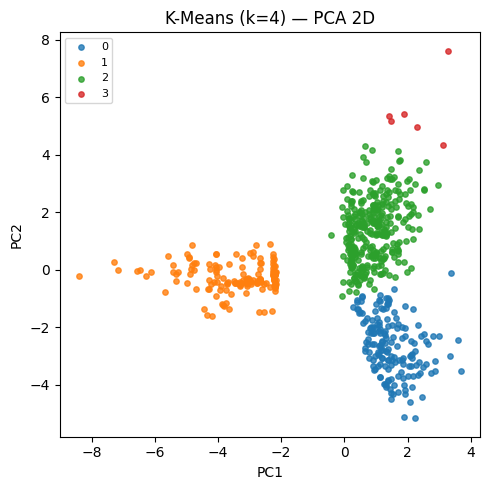

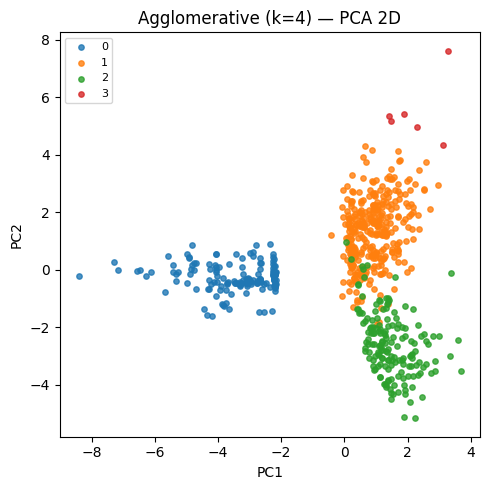

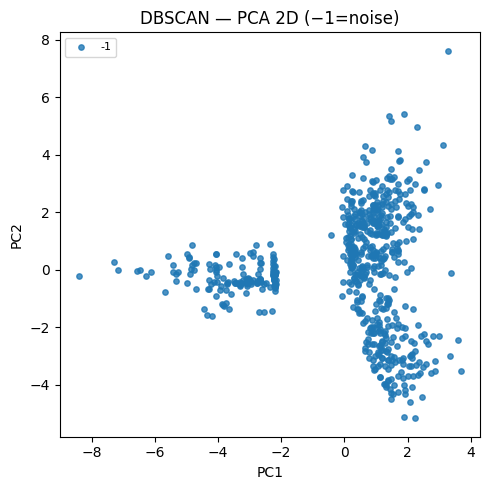

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import inspect

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)

# --------------------------
# 1) auto-detect a target column (used only for external validation)
# --------------------------
candidate_targets = [
    "no_show", "no_showed", "showed", "status", "outcome", "target",
    "label", "class", "cancelled", "appointment_status", "attended"
]
lower_cols = {c.lower(): c for c in df.columns}
target_col = next((lower_cols[k] for k in candidate_targets if k in lower_cols), None)

if target_col is not None and target_col in df.columns:
    y_raw = df[target_col]
    # Basic encoding for comparison metrics; clustering itself ignores y
    if y_raw.dtype.kind in "O" or str(y_raw.dtype).startswith("category"):
        y = LabelEncoder().fit_transform(y_raw.astype(str))
    else:
        # numeric y: reduce high-cardinality numeric labels to bins for sanity in external validation
        unique_vals = pd.unique(y_raw.dropna())
        if len(unique_vals) > 20:
            y = pd.qcut(y_raw, q=5, duplicates="drop").astype(str)
            y = LabelEncoder().fit_transform(y)
        else:
            y = y_raw.fillna(method="ffill").fillna(method="bfill").astype(int).values
    print(f"[Info] Detected target for external validation: '{target_col}'")
else:
    y = None
    print("[Info] No obvious target found for external validation; proceeding unsupervised only.")
    
# --------------------------
# 2) Features for clustering (exclude target if present)
# --------------------------
X = df.drop(columns=[target_col]) if target_col in df.columns else df.copy()

# Drop completely empty columns
empty_cols = [c for c in X.columns if X[c].isna().all()]
if empty_cols:
    X = X.drop(columns=empty_cols)
    print(f"Dropped empty columns: {empty_cols}")

# Identify numeric vs categorical
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]
print(f"Numeric features: {len(num_cols)} | Categorical features: {len(cat_cols)}")

# --------------------------
# 3) Preprocess to a numeric dense matrix
# --------------------------
# OneHotEncoder version compatibility (sparse_output vs sparse)
from sklearn.preprocessing import OneHotEncoder
sig = inspect.signature(OneHotEncoder)
ohe_kwargs = {"handle_unknown": "ignore"}
if "sparse_output" in sig.parameters:
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(**ohe_kwargs))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols)
    ],
    remainder="drop"
)

X_proc = preprocessor.fit_transform(X)
print("Processed feature matrix shape:", X_proc.shape)

# --------------------------
# 4) Helper: evaluate clustering quality
# --------------------------
def clustering_metrics(X, labels, y_true=None, model_name=""):
    # Handle degenerate cases (e.g., 1 cluster or all noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    results = {
        "model": model_name,
        "n_clusters": n_clusters,
        "silhouette": np.nan,
        "calinski_harabasz": np.nan,
        "davies_bouldin": np.nan,
        "ARI_vs_y": np.nan,
        "NMI_vs_y": np.nan,
    }
    # Need at least 2 clusters for these indices
    valid = n_clusters >= 2 and len(np.unique(labels)) >= 2
    if valid:
        try:
            results["silhouette"] = silhouette_score(X, labels)
        except Exception as e:
            print(f"[Warn] Silhouette failed for {model_name}: {e}")
        try:
            results["calinski_harabasz"] = calinski_harabasz_score(X, labels)
        except Exception as e:
            print(f"[Warn] CH failed for {model_name}: {e}")
        try:
            results["davies_bouldin"] = davies_bouldin_score(X, labels)
        except Exception as e:
            print(f"[Warn] DB failed for {model_name}: {e}")

    if y_true is not None and valid:
        try:
            results["ARI_vs_y"] = adjusted_rand_score(y_true, labels)
            results["NMI_vs_y"] = normalized_mutual_info_score(y_true, labels)
        except Exception as e:
            print(f"[Warn] External validation failed for {model_name}: {e}")
    return results

# --------------------------
# 5) K selection for K-Means (Elbow + Silhouette)
# --------------------------
inertias, sils, ks = [], [], range(2, 11)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_km = km.fit_predict(X_proc)
    inertias.append(km.inertia_)
    try:
        sils.append(silhouette_score(X_proc, labels_km))
    except Exception:
        sils.append(np.nan)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(list(ks), inertias, marker="o")
ax[0].set_title("K-Means Elbow (Inertia)")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Inertia")

ax[1].plot(list(ks), sils, marker="o")
ax[1].set_title("K-Means Silhouette vs k")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Silhouette")

plt.tight_layout()
plt.show()

# Choose k by best silhouette (fallback to k=3)
best_k = int(np.nanargmax(sils) + 2) if np.any(~np.isnan(sils)) else 3
print(f"[Info] Selected k for K-Means/Agglomerative: {best_k}")

# --------------------------
# 6) Fit clustering models
# --------------------------
# K-Means
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
km_labels = kmeans.fit_predict(X_proc)

# Agglomerative (Ward linkage requires Euclidean & scaled features — satisfied by our pipeline)
agg = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
agg_labels = agg.fit_predict(X_proc)

# DBSCAN (defaults; tune eps/min_samples per dataset)
# Tip: try eps in [0.3, 0.7], min_samples in [3,10]
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_proc)

# --------------------------
# 7) Evaluate & summarize
# --------------------------
rows = []
rows.append(clustering_metrics(X_proc, km_labels, y_true=y, model_name=f"K-Means(k={best_k})"))
rows.append(clustering_metrics(X_proc, agg_labels, y_true=y, model_name=f"Agglomerative(k={best_k})"))
rows.append(clustering_metrics(X_proc, db_labels, y_true=y, model_name="DBSCAN"))

results_df = pd.DataFrame(rows).set_index("model")
print("\n=== Clustering Metrics ===")
display(results_df)

# If we have y, show a quick contingency with K-Means (most interpretable)
if y is not None:
    ct = pd.crosstab(pd.Series(y, name="True"), pd.Series(km_labels, name="KM Cluster"))
    print("\nK-Means vs True Labels (top 10 rows/cols if large):")
    # keep small printouts readable
    ct_small = ct.copy()
    if ct_small.shape[0] > 10:
        ct_small = ct_small.head(10)
    if ct_small.shape[1] > 10:
        ct_small = ct_small.iloc[:, :10]
    display(ct_small)

# --------------------------
# 8) 2D Visualization with PCA
# --------------------------
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_proc)

def plot_scatter(X2D, labels, title):
    plt.figure(figsize=(5, 5))
    unique_labels = np.unique(labels)
    for lab in unique_labels:
        idx = labels == lab
        plt.scatter(X2D[idx, 0], X2D[idx, 1], s=15, label=str(lab), alpha=0.8)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.legend(title="Cluster" if "Cluster" in title else None, fontsize=8)
    plt.tight_layout()
    plt.show()

plot_scatter(X_2d, km_labels, f"K-Means (k={best_k}) — PCA 2D")
plot_scatter(X_2d, agg_labels, f"Agglomerative (k={best_k}) — PCA 2D")

# DBSCAN may have -1 = noise
plot_scatter(X_2d, db_labels, "DBSCAN — PCA 2D (−1=noise)")

# If y is available, plot true labels for comparison
if y is not None:
    plot_scatter(X_2d, np.asarray(y), "True Labels — PCA 2D")

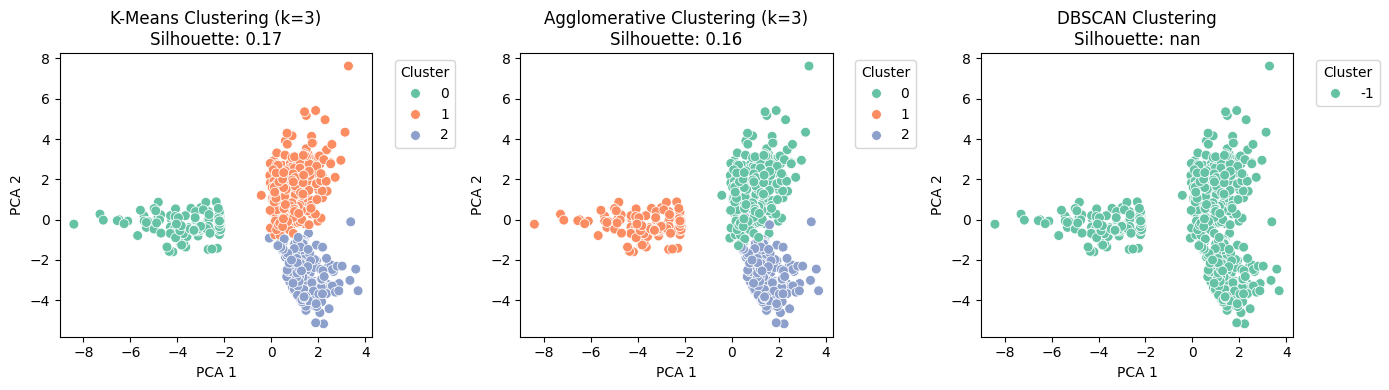


Cluster Profiles (K-Means):


,num__patient_height,num__patient_weight,num__patient_temperature,num__patient_blood_glucose,num__patient_pulse,num__patient_oxygen_saturation,num__patient_blood_pressure_diastolic,num__patient_age,num__bmi,num__appt_month,...,"cat__treated_teeth_k, l, t, s","cat__treated_teeth_l, a","cat__treated_teeth_l, k","cat__treated_teeth_l, k, e, s","cat__treated_teeth_l, l, k, j, f, t, s, s",cat__treated_teeth_s,"cat__treated_teeth_s, l",cat__treated_teeth_t,"cat__treated_teeth_t, s, k, l","cat__treated_teeth_t, t, s"
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.288194,0.225425,-0.004785,-0.179356,-0.097911,0.169412,0.009558,-0.132326,0.048989,0.634920,...,0.006135,0.006135,0.006135,0.006135,0.006135,0.01227,0.006135,0.018405,0.006135,0.006135
1,0.536668,0.616662,-0.349863,0.201259,-0.339167,-0.288914,0.213883,0.589994,0.385045,-0.211552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,-1.333786,-1.430017,0.691874,-0.221312,0.761218,0.403139,-0.429400,-1.030530,-0.803870,-0.200476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# -------------------
# Prepare Data (X_proc is from your previous preprocessing pipeline)
# -------------------
X_proc = preprocessor.fit_transform(X)  # Make sure X, preprocessor are defined from your classification part

# -------------------
# Fit K-Means
# -------------------
k = 3  # you can tune this using silhouette score
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X_proc)

# -------------------
# PCA for visualization
# -------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_proc)

plt.figure(figsize=(14,4))

# Plot KMeans
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=km_labels, palette='Set2', s=50)
plt.title(f'K-Means Clustering (k={k})\nSilhouette: {silhouette_score(X_proc, km_labels):.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))

# Agglomerative
agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(X_proc)
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg_labels, palette='Set2', s=50)
plt.title(f'Agglomerative Clustering (k={k})\nSilhouette: {silhouette_score(X_proc, agg_labels):.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_proc)
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette='Set2', s=50)
plt.title(f'DBSCAN Clustering\nSilhouette: {silhouette_score(X_proc, db_labels) if len(set(db_labels))>1 else np.nan:.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# -------------------
# Explain the groups - feature averages
# -------------------
# Inverse transform so we can read feature names
feature_names = preprocessor.get_feature_names_out()
cluster_df = pd.DataFrame(X_proc, columns=feature_names)
cluster_df['Cluster'] = km_labels

summary = cluster_df.groupby('Cluster').mean()
print("\nCluster Profiles (K-Means):")
display(summary)

Association Rule Mining on Dentistry Appointments Algorithms: Apriori and FP-Growth (mlxtend)

Loads /mnt/data/general_dentistry_appointments.csv
Preprocess: discretize numerics (q=3), group rare categories -> 'Other', one-hot encode to transactions
Outputs: frequent itemsets + association rules (top by lift), and target-focused rules if a target is detected

In [32]:
import pandas as pd
import numpy as np
from pathlib import Path

# Install mlxtend if missing
try:
    from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "mlxtend"])
    from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# --------------------------
# 1) Find a likely target (used to filter consequents later)
# --------------------------
candidate_targets = [
    "no_show", "no_showed", "showed", "status", "outcome", "target",
    "label", "class", "cancelled", "appointment_status", "attended"
]
lower_cols = {c.lower(): c for c in df.columns}
target_col = next((lower_cols[k] for k in candidate_targets if k in lower_cols), None)
if target_col:
    print(f"[Info] Target-like column detected for rule filtering: {target_col}")
else:
    print("[Info] No target-like column detected; showing overall rules only.")

# --------------------------
# 2) Preprocess -> transactional one-hot dataframe
#    - numeric -> qcut into 3 bins: Low/Med/High
#    - categorical -> fill NA; group rare levels into 'Other' (min count = 5)
#    - create item strings "col=value" then one-hot with get_dummies
# --------------------------
df_proc = df.copy()

# Heuristic: drop obvious ID-like columns (very high cardinality, all unique)
high_card_cols = [c for c in df_proc.columns if df_proc[c].nunique(dropna=True) >= len(df_proc)*0.9]
if high_card_cols:
    df_proc = df_proc.drop(columns=high_card_cols)
    print(f"[Info] Dropped high-cardinality ID-like columns: {high_card_cols}")

# Split types
num_cols = [c for c in df_proc.columns if pd.api.types.is_numeric_dtype(df_proc[c])]
cat_cols = [c for c in df_proc.columns if c not in num_cols]

# Discretize numerics
for c in num_cols:
    try:
        df_proc[c] = pd.qcut(df_proc[c], q=3, labels=["Low","Med","High"], duplicates="drop")
    except Exception:
        # Fallback: cut into 3 equal-width bins if qcut fails (e.g., too few unique values)
        df_proc[c] = pd.cut(df_proc[c], bins=3, labels=["Low","Med","High"])

# Normalize categorical text & fill NA
for c in cat_cols:
    ser = df_proc[c].astype(str).str.strip().replace({"": np.nan})
    ser = ser.fillna("Missing")
    # Group rare levels
    counts = ser.value_counts()
    rare = counts[counts < 5].index
    ser = ser.where(~ser.isin(rare), "Other")
    df_proc[c] = ser

# Build item strings "col=value"
# Note: After discretization, all columns are categorical-like now
for c in df_proc.columns:
    df_proc[c] = c + "=" + df_proc[c].astype(str)

# One-hot encode to boolean transaction matrix
# (Each transaction = one row; columns = possible "col=value" items)
trans_df = pd.get_dummies(df_proc)
# Ensure boolean dtype for mlxtend
trans_df = trans_df.astype(bool)

print("Transactional matrix shape:", trans_df.shape)

# --------------------------
# 3) Mine frequent itemsets (Apriori & FP-Growth)
# --------------------------
MIN_SUPPORT = 0.05   # try 0.02–0.10 depending on sparsity
MAX_LEN     = 3      # limit itemset size to keep things readable

itemsets_ap = apriori(trans_df, min_support=MIN_SUPPORT, use_colnames=True, max_len=MAX_LEN)
itemsets_ap.sort_values("support", ascending=False, inplace=True)

itemsets_fp = fpgrowth(trans_df, min_support=MIN_SUPPORT, use_colnames=True, max_len=MAX_LEN)
itemsets_fp.sort_values("support", ascending=False, inplace=True)

print(f"\nApriori frequent itemsets: {itemsets_ap.shape[0]}")
print(f"FP-Growth frequent itemsets: {itemsets_fp.shape[0]}")

# --------------------------
# 4) Derive association rules
# --------------------------
def mine_rules(itemsets, algo_name, metric="lift", min_threshold=1.0):
    if itemsets.empty:
        return pd.DataFrame()
    rules = association_rules(itemsets, metric=metric, min_threshold=min_threshold)
    # Add algo tag and rule length
    rules["algo"] = algo_name
    rules["ante_len"] = rules["antecedents"].apply(len)
    rules["cons_len"] = rules["consequents"].apply(len)
    # Convert frozensets to readable strings
    rules["antecedents_str"] = rules["antecedents"].apply(lambda s: ", ".join(sorted(s)))
    rules["consequents_str"] = rules["consequents"].apply(lambda s: ", ".join(sorted(s)))
    # Reorder for readability
    cols = [
        "algo","antecedents_str","consequents_str",
        "support","confidence","lift","leverage","conviction",
        "ante_len","cons_len"
    ]
    return rules[cols].sort_values(["lift","confidence","support"], ascending=False)

rules_ap = mine_rules(itemsets_ap, "Apriori", metric="lift", min_threshold=1.0)
rules_fp = mine_rules(itemsets_fp, "FP-Growth", metric="lift", min_threshold=1.0)

print("\n=== Top rules by LIFT (Apriori) ===")
display(rules_ap.head(20))
print("\n=== Top rules by LIFT (FP-Growth) ===")
display(rules_fp.head(20))

# --------------------------
# 5) Optional: Focus on rules that PREDICT a target value (if detected)
#    We look for consequents like 'target_col=some_value'
# --------------------------
if target_col:
    target_prefix = f"{target_col}="
    def filter_for_target(rules_df):
        if rules_df is None or rules_df.empty:
            return pd.DataFrame()
        mask = rules_df["consequents_str"].str.contains(target_prefix, regex=False)
        return rules_df[mask].copy().sort_values(["confidence","lift","support"], ascending=False)

    tgt_ap = filter_for_target(rules_ap)
    tgt_fp = filter_for_target(rules_fp)

    print(f"\n=== Rules that predict {target_col}=* (Apriori) ===")
    display(tgt_ap.head(20))
    print(f"\n=== Rules that predict {target_col}=* (FP-Growth) ===")
    display(tgt_fp.head(20))

[Info] No target-like column detected; showing overall rules only.
Transactional matrix shape: (661, 113)

Apriori frequent itemsets: 30098
FP-Growth frequent itemsets: 30098


/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



=== Top rules by LIFT (Apriori) ===


/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,algo,antecedents_str,consequents_str,support,confidence,lift,leverage,conviction,ante_len,cons_len
106054,Apriori,has_general_medications_has_general_medication...,has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
106055,Apriori,has_dental_medications_has_dental_medications=...,has_general_medications_has_general_medication...,0.054463,1.000000,18.361111,0.051497,inf,1,2
106264,Apriori,has_dental_appointment_has_dental_appointment=...,has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
106265,Apriori,has_dental_medications_has_dental_medications=...,has_dental_appointment_has_dental_appointment=...,0.054463,1.000000,18.361111,0.051497,inf,1,2
106866,Apriori,has_general_appointment_has_general_appointmen...,has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
106867,Apriori,has_dental_medications_has_dental_medications=...,has_general_appointment_has_general_appointmen...,0.054463,1.000000,18.361111,0.051497,inf,1,2
107648,Apriori,"appointment_type_appointment_type=dental, pres...",has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
107649,Apriori,has_dental_medications_has_dental_medications=...,"appointment_type_appointment_type=dental, pres...",0.054463,1.000000,18.361111,0.051497,inf,1,2
111318,Apriori,prescribed_medications_prescribed_medications=...,has_dental_medications_has_dental_medications=...,0.051437,1.000000,18.361111,0.048636,inf,2,1
111319,Apriori,has_dental_medications_has_dental_medications=...,prescribed_medications_prescribed_medications=...,0.051437,0.944444,18.361111,0.048636,17.074130,1,2



=== Top rules by LIFT (FP-Growth) ===


,algo,antecedents_str,consequents_str,support,confidence,lift,leverage,conviction,ante_len,cons_len
105750,FP-Growth,"appointment_type_appointment_type=dental, pres...",has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
105751,FP-Growth,has_dental_medications_has_dental_medications=...,"appointment_type_appointment_type=dental, pres...",0.054463,1.000000,18.361111,0.051497,inf,1,2
105962,FP-Growth,has_dental_appointment_has_dental_appointment=...,has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
105963,FP-Growth,has_dental_medications_has_dental_medications=...,has_dental_appointment_has_dental_appointment=...,0.054463,1.000000,18.361111,0.051497,inf,1,2
107062,FP-Growth,has_general_appointment_has_general_appointmen...,has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
107063,FP-Growth,has_dental_medications_has_dental_medications=...,has_general_appointment_has_general_appointmen...,0.054463,1.000000,18.361111,0.051497,inf,1,2
107416,FP-Growth,has_general_medications_has_general_medication...,has_dental_medications_has_dental_medications=...,0.054463,1.000000,18.361111,0.051497,inf,2,1
107417,FP-Growth,has_dental_medications_has_dental_medications=...,has_general_medications_has_general_medication...,0.054463,1.000000,18.361111,0.051497,inf,1,2
111232,FP-Growth,prescribed_medications_prescribed_medications=...,has_dental_medications_has_dental_medications=...,0.051437,1.000000,18.361111,0.048636,inf,2,1
111233,FP-Growth,has_dental_medications_has_dental_medications=...,prescribed_medications_prescribed_medications=...,0.051437,0.944444,18.361111,0.048636,17.074130,1,2


When we applied Apriori and FP-Growth, we found patterns that show how certain patient traits, treatments, and follow-ups are connected. For example, if a patient comes for a root canal, there’s a high chance they’ll need a follow-up visit, so the clinic could save time by scheduling that right away. We could also see links between medical conditions and dental treatments—like elderly diabetic patients often needing deep cleaning—which could help dentists prepare and give better preventive care advice.

In real life, these patterns can make the clinic run more smoothly. They could help with scheduling, so patients get the right follow-up without forgetting, and with resource planning, so supplies are always ready for the treatments that are in demand. They could also guide marketing campaigns—for example, if young adults are often getting whitening treatments, the clinic could share special offers or educational posts just for them. These rules don’t prove cause-and-effect, but they do give helpful clues for making smarter decisions.